In [5]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT01\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT01\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
df = pd.read_excel("NLP_Data.xlsx")
df.columns

Index(['Description of the Grievance', 'Grievance Category',
       'Grievance SubCategory'],
      dtype='object')

In [8]:
df.dropna(subset=["Description of the Grievance"], inplace=True)

In [9]:
complete = df[df["Grievance Category"].notnull()]

In [10]:
complete.shape

(499, 3)

In [11]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming (Porter Stemmer)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Lemmatization (WordNet Lemmatizer) with POS tagging
    lemmatizer = WordNetLemmatizer()
    tagged_tokens = pos_tag(tokens)
    lemmatized_tokens = []
    for word, tag in tagged_tokens:
        if tag.startswith('N'):  # Noun
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('V'):  # Verb
            lemma = lemmatizer.lemmatize(word, pos='v')
        else:
            lemma = word  # Keep other POS tags unchanged
        lemmatized_tokens.append(lemma)
    
    # Join tokens back into a cleaned text
    cleaned_text = " ".join(lemmatized_tokens)
    
    return cleaned_text

In [61]:
corpus = complete["Description of the Grievance"].apply(preprocess_text)

In [64]:
complete['Description of the Grievance'] = corpus

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_17212\3196157861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete['Description of the Grievance'] = corpus


In [66]:
complete.head()

,Description of the Grievance,Grievance Category,Grievance SubCategory
0,concern regard laboratori test bill twice,Billing/Financial Dispute,Provider Claim Issues
1,dassatifact provid,Quality Of Service,Not Satisfied With Provider Services
2,dissatisafact delay care,Access And Availability,Pharmacy
3,dissatisafact dental provid way conduct busi,Quality Of Service,Not Satisfied With Provider Services
4,dissatisfact inform dental benefit coverag mem...,Billing/Financial Dispute,Balance Billing


In [41]:
X = complete['Description of the Grievance'].values
y_category = complete["Grievance Category"].values
y_subcategory = complete["Grievance SubCategory"].values

<Axes: >

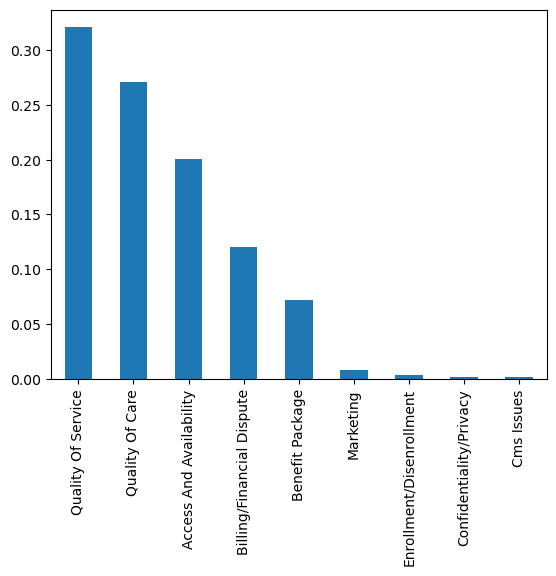

In [60]:
complete["Grievance Category"]. value_counts(normalize = True). plot.bar()

ValueError: y contains previously unseen labels: 'Confidentiality/Privacy'

In [71]:
X_train, X_test, y_category_train, y_category_test, y_subcategory_train, y_subcategory_test = train_test_split(
    X, y_category, y_subcategory, test_size=0.2, random_state=123
)



In [72]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_category_train_encoded = label_encoder.fit_transform(y_category_train)
y_category_test_encoded = label_encoder.transform(y_category_test)

y_subcategory_train_encoded = label_encoder.fit_transform(y_subcategory_train)
y_subcategory_test_encoded = label_encoder.transform(y_subcategory_test)


ValueError: y contains previously unseen labels: 'Confidentiality/Privacy'

In [52]:
tfidf_vectorizer = TfidfVectorizer(max_features=8000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [53]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()

# X_train_cv = cv.fit_transform(X_train)
# X_test_cv = cv.fit_transform(X_test)

In [54]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()

# lr.fit(X_train_cv, y_category_train)



# # predictions = lr.predict(X_test_cv)

# # predictions



In [55]:
# prediction = lr.predict(X_test_cv)

In [56]:
#Category classifier
category_classifier = MultinomialNB()
category_classifier.fit(X_train_tfidf, y_category_train)

# Subcategory classifier
subcategory_classifier = MultinomialNB()
subcategory_classifier.fit(X_train_tfidf, y_subcategory_train)

MultinomialNB()

In [57]:
# Predict categories and subcategories
y_category_pred = category_classifier.predict(X_test_tfidf)
y_subcategory_pred = subcategory_classifier.predict(X_test_tfidf)

# Calculate accuracy for categories and subcategories
category_accuracy = accuracy_score(y_category_test, y_category_pred)
subcategory_accuracy = accuracy_score(y_subcategory_test, y_subcategory_pred)

# Print the accuracies
print(f"Category Accuracy: {category_accuracy:.2f}")
print(f"Subcategory Accuracy: {subcategory_accuracy:.2f}")

# Optionally, you can print a classification report for more detailed metrics
print("\nCategory Classification Report:")
print(classification_report(y_category_test, y_category_pred))

print("\nSubcategory Classification Report:")
print(classification_report(y_subcategory_test, y_subcategory_pred))


Category Accuracy: 0.44
Subcategory Accuracy: 0.35

Category Classification Report:
                           precision    recall  f1-score   support

  Access And Availability       0.67      0.10      0.17        21
          Benefit Package       0.00      0.00      0.00        12
Billing/Financial Dispute       0.50      0.07      0.12        14
  Confidentiality/Privacy       0.00      0.00      0.00         1
                Marketing       0.00      0.00      0.00         1
          Quality Of Care       0.53      0.76      0.63        21
       Quality Of Service       0.38      0.83      0.53        30

                 accuracy                           0.44       100
                macro avg       0.30      0.25      0.21       100
             weighted avg       0.44      0.44      0.34       100


Subcategory Classification Report:
                                      precision    recall  f1-score   support

                         Ancillaries       0.00      0.00    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr